# Gradient of Image

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [4]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [6]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
h, w, c = I0.shape
num_row     = h
num_column  = w
num_channel = c
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [128]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
# h,w,c = I0.shape
# I= np.zeros((h, w), np.uint8)

# I = I0


# for y in range(0, h):
#     for x in range(0, w):
#         b = I.item(y, x, 0)
#         g = I.item(y, x, 1)
#         r = I.item(y, x, 2)

#         gray = (int(b) + int(g) + int(r)) /3.0
        
#         if gray >255:
#             gray = 255

#         I.itemset(y,x,gray)

# h1,w1=I.shape
# num_row = h1
# num_column = w1  처음시도한거 for문은 최대한제거

I = I0[:,:,0]/3 + I0[:,:,1]/3 + I0[:,:,2]/3


h1, c1 =I.shape
num_row = h1
num_column = c1

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)


number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [133]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#



I = (I-I.min())/(I.max() - I.min())

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

(510, 512)
maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [138]:
print(I.shape)
I_0=np.ones((1,w))
I_1 = np.vstack([I,I_0])
I_2 = np.vstack([I_0,I])
I=I_1-I_2
print(I)
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I[:,:] 
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

(510, 512)
[[-0.46428571 -0.0502442   0.02286325 ... -0.00896921 -0.5683416
   0.9882199 ]
 [-0.4744898  -0.00414268 -0.05470085 ...  0.01495113 -0.59517008
   0.9947644 ]
 [-0.52210884  0.05715158 -0.06837607 ... -0.04715102 -0.5696505
   0.9895288 ]
 ...
 [-0.48809524 -0.00934066  0.0324359  ...  0.2007671  -0.9571355
   0.96727749]
 [-0.51870748  0.040075   -0.05970085 ... -0.01212982 -0.84656128
   0.9986911 ]
 [-0.53911565  0.01432932 -0.03854701 ... -0.01801586 -0.78714835
   0.9960733 ]]


- backward difference : $ I[x, y] - I[x-1, y] $ 

In [ ]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [ ]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [ ]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [ ]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [ ]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [ ]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [62]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [63]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [64]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [65]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [66]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [67]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [68]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [69]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [70]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [71]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [72]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [73]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [74]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [75]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [78]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [79]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [80]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


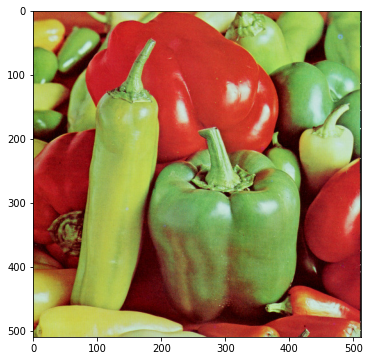

**************************************************
## [RESULT 02]
**************************************************


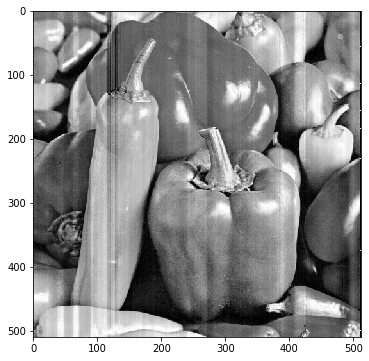

**************************************************
## [RESULT 03]
**************************************************


NameError: name 'compute_derivative_x_forward' is not defined

In [134]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)